In [1]:
import sklearn.datasets
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from tqdm.auto import tqdm

In [2]:
count_sample = 50_000
noise_sample = 0.01
count_bg = 10_000

In [3]:
moons = sklearn.datasets.make_moons(n_samples=count_sample, noise=noise_sample)
new_ax = np.random.rand(count_sample)*2 - 1
moons_p = np.stack((moons[0][:, 0], new_ax, moons[0][:, 1]), 1)
moons_0 = moons_p[moons[1] == 0]
moons_1 = moons_p[moons[1] == 1]
moons_0[:, 0] = moons_0[:, 0] / 1.5 - 0.3
moons_1[:, 0] = moons_1[:, 0] / 1.5 - 0.3
moons_0 = (moons_0 + 1) /2
moons_1 = (moons_1 + 1) /2

In [4]:
swiss = sklearn.datasets.make_swiss_roll(n_samples=count_sample, noise=noise_sample)
swiss = swiss[0]/10
swiss[:, 1] = swiss[:, 1] - 1
swiss = (swiss + 1) /2

In [5]:
curve = sklearn.datasets.make_s_curve(n_samples=count_sample, noise=noise_sample)
curve = curve[0]
curve[:, 2] = curve[:, 2]/2
curve[:, 1] = curve[:, 1] - 1
curve = (curve + 1) /2

In [6]:
swiss2 = sklearn.datasets.make_swiss_roll(n_samples=count_sample, noise=noise_sample)
swiss2 = swiss2[0]/10
swiss2[:, 1] = swiss2[:, 1] - 1
swiss2 = (swiss2 + 1) /2
swiss2[:, 0] = swiss2[:, 0] / 8 + 0.3
swiss2[:, 2] = swiss2[:, 2] / 8 + 0.1

In [18]:
swiss3 = sklearn.datasets.make_swiss_roll(n_samples=count_sample, noise=noise_sample)
swiss3 = swiss3[0]/10
swiss3[:, 1] = swiss3[:, 1] - 1
swiss3 = (swiss3 + 1) /2
swiss3[:, 0] = swiss3[:, 0] / 8 + 0.1
swiss3[:, 2] = 0.1 - swiss3[:, 2] / 8 + 0.3

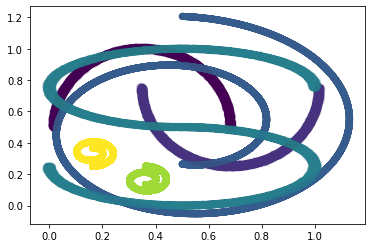

In [19]:
plt.scatter(*np.concatenate([moons_0, 
                             moons_1, 
                             swiss,
                             swiss2,
                             swiss3,
                             curve])[:, [0, 2]].T, 
            c=np.concatenate([np.ones(len(moons_0)), 
                              np.ones(len(moons_1))*2, 
                              np.ones(len(swiss))*3,
                              np.ones(len(swiss2))*7,
                              np.ones(len(swiss3))*8,
                              np.ones(len(curve))*4]), 
            alpha=0.1)

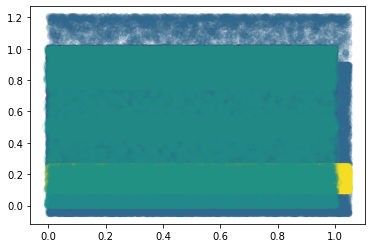

In [21]:
plt.scatter(*np.concatenate([moons_0, 
                             moons_1, 
                             swiss,
                             swiss2,
                             curve])[:, [1, 2]].T, 
            c=np.concatenate([np.ones(len(moons_0)), 
                              np.ones(len(moons_1))*2, 
                              np.ones(len(swiss))*3,
                              np.ones(len(swiss))*7,
                              np.ones(len(curve))*4]), 
            alpha=0.1)

In [22]:
sh = 512
thr = 0.02
arr = np.zeros((sh, sh, sh))

In [23]:
stacks = np.meshgrid(np.arange(sh), np.arange(sh), np.arange(sh))

In [24]:
d_stack = np.stack(stacks, -1).reshape(-1, 3)[None, :]/sh

In [25]:
d_stack.shape

(1, 134217728, 3)

In [26]:
import torch

In [17]:
def one_batch_compare(figure, compare):
    compare = torch.from_numpy(compare.astype(np.float16)).to('cuda:0')
    return (torch.sqrt(((figure - compare)**2).sum(-1)).min(0)[0] < thr).detach().cpu().numpy()

In [18]:
bs = (128**2*2)

In [19]:
distances_to_swiss = []
with torch.no_grad():
    figure = torch.from_numpy(swiss[:, None, :].astype(np.float16)).to('cuda:0')
    for batch_id in tqdm(range(int(np.ceil(d_stack.shape[1]/bs)))):
        distances_to_swiss.append(one_batch_compare(figure, d_stack[:, batch_id*bs:(batch_id+1)*bs]))
distances_to_swiss = np.concatenate(distances_to_swiss).reshape((sh, sh, sh))

  0%|          | 0/4096 [00:00<?, ?it/s]

In [20]:
distances_to_moon_0 = []
with torch.no_grad():
    figure = torch.from_numpy(moons_0[:, None, :].astype(np.float16)).to('cuda:0')
    for batch_id in tqdm(range(int(np.ceil(d_stack.shape[1]/bs)))):
        distances_to_moon_0.append(one_batch_compare(figure, d_stack[:, batch_id*bs:(batch_id+1)*bs]))
distances_to_moon_0 = np.concatenate(distances_to_moon_0).reshape((sh, sh, sh))

  0%|          | 0/4096 [00:00<?, ?it/s]

In [21]:
distances_to_moon_1 = []
with torch.no_grad():
    figure = torch.from_numpy(moons_1[:, None, :].astype(np.float16)).to('cuda:0')
    for batch_id in tqdm(range(int(np.ceil(d_stack.shape[1]/bs)))):
        distances_to_moon_1.append(one_batch_compare(figure, d_stack[:, batch_id*bs:(batch_id+1)*bs]))
distances_to_moon_1 = np.concatenate(distances_to_moon_1).reshape((sh, sh, sh))

  0%|          | 0/4096 [00:00<?, ?it/s]

In [22]:
distances_to_curve = []
with torch.no_grad():
    figure = torch.from_numpy(curve[:, None, :].astype(np.float16)).to('cuda:0')
    for batch_id in tqdm(range(int(np.ceil(d_stack.shape[1]/bs)))):
        distances_to_curve.append(one_batch_compare(figure, d_stack[:, batch_id*bs:(batch_id+1)*bs]))
distances_to_curve = np.concatenate(distances_to_curve).reshape((sh, sh, sh))

  0%|          | 0/4096 [00:00<?, ?it/s]

In [23]:
distances_to_swiss2 = []
with torch.no_grad():
    figure = torch.from_numpy(swiss2[:, None, :].astype(np.float16)).to('cuda:0')
    for batch_id in tqdm(range(int(np.ceil(d_stack.shape[1]/bs)))):
        distances_to_swiss2.append(one_batch_compare(figure, d_stack[:, batch_id*bs:(batch_id+1)*bs]))
distances_to_swiss2 = np.concatenate(distances_to_swiss2).reshape((sh, sh, sh))

  0%|          | 0/4096 [00:00<?, ?it/s]

In [24]:
%%time
arr[distances_to_swiss] = 4
arr[distances_to_swiss2] = 7
arr[distances_to_curve] = 3
arr[distances_to_moon_1] = 2
arr[distances_to_moon_0] = 1

CPU times: user 292 ms, sys: 396 ms, total: 688 ms
Wall time: 685 ms


In [26]:
np.save('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation_phantom_512_v2.npy', arr)

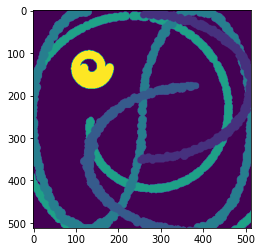

In [25]:
plt.imshow(arr[0])

In [2]:
arr = np.load('/mnt/HD-LSDF/sd18a004/for_yaroslav/simulation_phantom_512_v2.npy')

([], [])

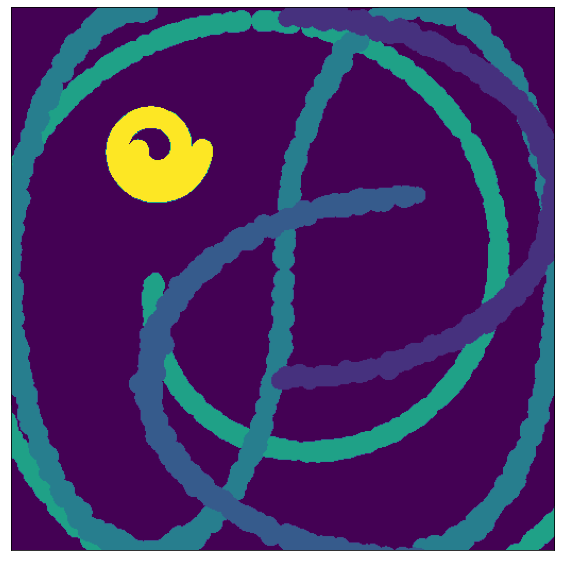

In [4]:
plt.figure(figsize=(10, 10))
plt.imshow(arr[0])
plt.xticks([])
plt.yticks([])